# Section: Mass-Observable Relation

Here I plot the figures of the section mass-obsservable relation from Esteves et al. 2022. 

In [60]:
# Loading packages
import pandas as pd
import numpy as np
import os
from collections import defaultdict

# import scipy.stats as st
# from astropy.table import Table, vstack
# from astropy.io.fits import getdata

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)

In [61]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 16})

#Plotting parameters
import matplotlib as mpl
mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20
mpl.rcParams['axes.linewidth'] = 3. #set the value globally
# sns.set_context('paper')

In [62]:
import sys
sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/selectionEffect/')

from fit_mor_evolution import mass_observable_relation, load_mor_results, save_mor_results

In [63]:
count=0
def save_figures(fig,count,is_tight=True,dpi=100,ext='pdf'):
    if is_tight: fig.tight_layout()
    fig.savefig('figures/fig_mor_%i.%s'%(count,ext),dpi=dpi,facecolor='w',transparent=False)

In [64]:
## Defining runs
pz_files = ['gauss001','gauss003','gauss005']
z_widths = [0.01,0.03,0.05]
r_apers  = [0.50, 0.75, 1.0]

runs_all = []
for zfile in pz_files:
    runs_all += ['{}_{}_{}_raper{:02d}'.format(zfile,'rhod','02Lstar',int(100*ri)) for ri in r_apers]
runs_all

['gauss001_rhod_02Lstar_raper50',
 'gauss001_rhod_02Lstar_raper75',
 'gauss001_rhod_02Lstar_raper100',
 'gauss003_rhod_02Lstar_raper50',
 'gauss003_rhod_02Lstar_raper75',
 'gauss003_rhod_02Lstar_raper100',
 'gauss005_rhod_02Lstar_raper50',
 'gauss005_rhod_02Lstar_raper75',
 'gauss005_rhod_02Lstar_raper100']

In [65]:
mor_relation_label = r'$\langle log_{10} \mu_{\star} | M_{200} \rangle  = \alpha+\beta \; log_{10} (M_{200})$' 

In [66]:
# colors = np.array([sns.color_palette("hls",5)[xx] for xx in range(3)])
colors = ['#F582A7','#F10086',"#711A75",'#180A0A']
fmts = ['o','*','d','h','s']

In [67]:
mor_evol = load_mor_results('mor_uniform_pz_and_raper_variation_evol_nbins6')

zbins = np.linspace(0.1,0.65,7)
zmed = 0.5*(zbins[1:]+zbins[:-1])

In [68]:
mor_relation_label = r'$\langle log_{10} \mu_{\star} | M_{200} \rangle  = \alpha+\beta \; log_{10} (M_{200})$' 
xlabel = r'$log_{10}\left( M_{200}/M_{\odot} \right) $'
ylabel = r'$log_{10}\left( \mu_{\star}/M_{\odot} \right)$'

labels = [xlabel,ylabel]

In [69]:
def get_params(self,name,variable_name):
    a = self.data[name]['linmix'][variable_name]
    b = self.data[name]['linmix'][variable_name+'-']
    c = self.data[name]['linmix'][variable_name+'+']
    return np.array([a,a-b,c-a])

In [70]:
def re_size(x,Mp=10.**15.5):
    return np.log10(Mp*10**x*0.7)

def plot_line(x,y,ym,yp,color=None,ax=None,label="",ls='-',lw=1, fill=True):
    if ax is None: ax = plt.axes()
        
    #ax.plot(x, y, lw=6, color='k', label="")
    p = ax.plot(x, y, color=color, label=label, ls=ls, lw=lw)
    color = p[0].get_color()
    if fill:
        ax.fill_between(x,ym,yp, lw=3, color=color, alpha = 0.4)
    return color
    
def plot_output(self,name,var,is_log=True,ax=None,label=None,color=None,show_data=True,show_kllr=False):
    if ax is None: ax = plt.axes()
    if label is None: label=name
    try:
        linmix = self.data[name]['linmix']        
        color  = plot_line(re_size(linmix['x']),linmix[var],linmix[var+'-'],linmix[var+'+'],
                           ax=ax,label=label,lw=3,color=color)
    except:
        print('Run Linmix!')
    if show_kllr:
        kllr   = self.data[name]['kllr']
        _      = plot_line(re_size(kllr['x']),kllr[var],kllr[var+'-'],kllr[var+'+'],
                          ls='--',ax=ax,label="",color=color)
        
    if (show_data) & (var=='y'):
        x,y,xerr,yerr = self.get_variable(name,is_log=is_log)
        
        ax.scatter(re_size(x),y, s=100, alpha=0.3, color=color, label="")
        #ax.errorbar(re_size(x),y,yerr=yerr,color=color,fmt='o')
        
    return ax

In [85]:

def get_fit_label(self, name, label_title=None):
    if label_title is None: label_title=name
    alpha = np.nanmedian(self.data[name]['linmix']['intercept'])
    alphaE = 0.5*(np.nanmedian(self.data[name]['linmix']['intercept+']-self.data[name]['linmix']['intercept-']))

    slope = np.nanmedian(self.data[name]['linmix']['slope'])
    slopeE = 0.5*(np.nanmedian(self.data[name]['linmix']['slope+']-self.data[name]['linmix']['slope-']))

    scatter = np.nanmedian(self.data[name]['linmix']['scatter'])
    scatterE = 0.5*(np.nanmedian(self.data[name]['linmix']['scatter+']-self.data[name]['linmix']['scatter-']))

    label = '%s: $\\sigma = %.2f$ dex \n'%(label_title, scatter)
    label+= '$\\alpha = %.2f \\pm %.3f$'%(alpha,alphaE)
    label+= '\n$\\beta = %.2f \\pm %.3f$'%(slope,slopeE)
    return label
# label2 = '$\\alpha, \\beta = %.3f, %.3f$'%(alpha,slope)

In [86]:
import linmix

def get_scatter_fixed_obs(lm):
    slope_l, slope_m, slope_u = np.mean(lm['slope-']),np.mean(lm['slope']),np.mean(lm['slope+'])
    scatter_l, scatter_m, scatter_u = np.mean(lm['scatter-']),np.mean(lm['scatter']),np.mean(lm['scatter+'])
    scatter_fixed_obs = scatter_m/slope_m
    
    errA = 0.5*(scatter_u-scatter_l)
    errB = 0.5*(slope_u-slope_l)
    errS = scatter_fixed_obs*np.sqrt( (errA/scatter_m)**2 + (errB/slope_m)**2 )    
    return scatter_fixed_obs, errS

def plot_par_evolution(self,zmed,var,name,ax=None,do_fit=False,
                       zp=0.35,fmt='o',color='b',color2='k',label=''):
    if ax is None: ax = plt.axes()
    
    to_fit = []
    #nbins = self.data[name%0]['nBins']
    if not var=='scatter2':
        for i in range(len(zmed)):
            zi = zmed[i]
            lm = self.data[name%i]['linmix']
            median = np.mean(lm[var])
            lower_quartile, upper_quartile = np.mean(lm[var+'-']),np.mean(lm[var+'+'])
            si = 0.5*(upper_quartile-lower_quartile)
            to_fit.append([zi,median,si,lower_quartile,upper_quartile])
    else:
        for i,zi in enumerate(zmed):
            lm = self.data[name%i]['linmix']
            si, errSi = get_scatter_fixed_obs(lm)
            to_fit.append([zi,si,errSi,si-errSi/2.,si+errSi/2.])
    to_fit = np.array(to_fit).T
    
    #p = ax.plot(to_fit[0], to_fit[1], fmt, color=color,label=label)
    #ax.vlines(to_fit[0], to_fit[3], to_fit[4], color=p[0].get_color(), capsize=6, capthick=3)
    ax.errorbar(to_fit[0], to_fit[1], yerr=[to_fit[1]-to_fit[3],to_fit[4]-to_fit[1]],color=color,
                 fmt=fmt, capsize=6, capthick=3, markersize=8, label=label)
    
    cut = to_fit[0]>0.34
    ax.axhline(np.mean(to_fit[1][cut]), color=color, ls='--')
    #ax.plot([0.34, np.max(to_fit[0])+0.025],[np.mean(to_fit[1][cut]), np.mean(to_fit[1][cut])], color=color, ls='--')
    #ax.axvline(0.32, color='k', ls='--')
    
    if do_fit:
        eta = np.log((1+to_fit[0])/(1+zp))
        lm1 = linmix.LinMix(eta, to_fit[1], ysig=to_fit[2], nchains=4,  K=3)
        lm1.run_mcmc(silent=True, maxiter=10000)
        plot_linmix(np.linspace(np.min(to_fit[0])-0.025,np.max(to_fit[0])+0.025,31),lm1,zp=zp,ax=ax,color=color1)
        
    #ax.set_ylabel(var)

def plot_linmix(z,lm1,zp=0.4,ax=None,color='k',label=''):
    if ax is None: ax = plt.axes()
    
    eta = np.log((1+z)/(1+zp))
    m1 = np.median(lm1.chain['alpha'][:,np.newaxis]     + lm1.chain['beta'][:,np.newaxis]*eta,axis=0)
    q1 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,16,axis=0)
    q2 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,84,axis=0)
    
    p = ax.plot(z,m1,color=color,label=label)
    ax.fill_between(z,q1,q2,alpha=0.3,color=p[0].get_color())


## Figure 1 - Linear Fit Example

In [98]:
run = runs_all[2+3]
ixz = 4
zlabel = '%.2f < z < %.2f'%(zbins[ixz],zbins[ixz+1])

print('picking run: %s'%run)
print('at redshift bins: %s'%zlabel)

name = run+'_z%i'%ixz
namet= run+'_true_z%i'%ixz

picking run: gauss003_rhod_02Lstar_raper100
at redshift bins: 0.47 < z < 0.56


This run is: gauss003_rhod_02Lstar_raper100


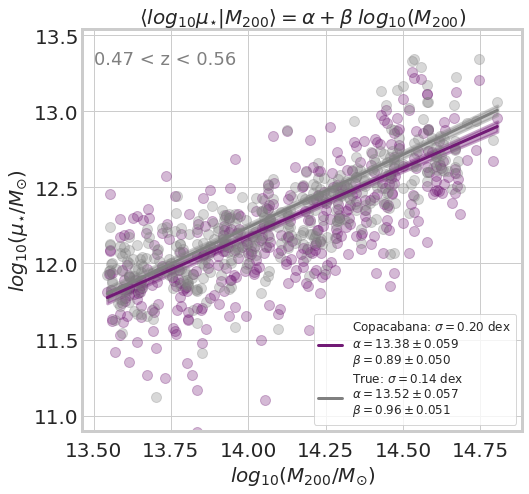

In [100]:
#Generate figure if none provided
fig, axs = plt.subplots(1, 1, figsize=(8, 8*3/4 + 1.5))

ax = axs
plot_output(mor_evol, name, 'y', show_data=True, ax = ax, color=colors[2], label=get_fit_label(mor_evol,name,'Copacabana'))
plot_output(mor_evol, namet, 'y', show_data=True, ax = ax, color='gray', label=get_fit_label(mor_evol,namet,'True'))

ax.text(13.5, 13.31, zlabel, fontsize=18, color='gray')
ax.legend(fontsize=12)
ax.set_ylim(10.9,)
ax.set_ylabel(labels[1],fontsize=20)
ax.set_xlabel(labels[0],fontsize=20)
ax.set_title(mor_relation_label,fontsize=20)
save_figures(fig,1,is_tight=True, ext='png')
save_figures(fig,1,is_tight=True)
print('This run is: %s'%run)
# count+=1

## Figure 2 - Scatter dependence with photo-z quality and cluster aperture

In [102]:
keys = {'scatter':'scatter: $\\sigma$ [dex]','intercept':'intercept: $\\alpha$','slope':'slope: $\\beta$'}
par_name = 'scatter'

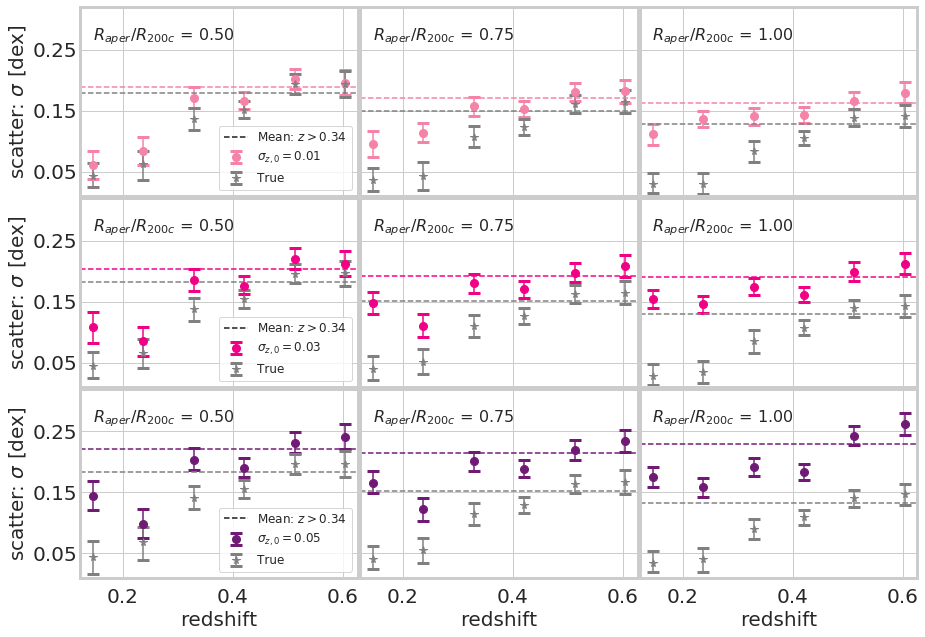

In [104]:
prop = 1/2.
fig, axs = plt.subplots(3, 3, figsize=(3*5, 5*3*prop+3), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
mylabels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=20)
    
    for j in range(3):
        run = runs_all[3*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=mylabels[0]%z_widths[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=mylabels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,0.265,title)
        
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=20)
    ax[0].axhline(-1., color='k', ls='--',label='Mean: $z>0.34$')
    ax[0].legend(loc='lower right', fontsize=12)
    ax[0].set_ylim(0.01,0.32)
    ax[0].set_yticks(np.linspace(0.05,0.25,3))
# fig.suptitle(mor_relation_label,fontsize=20)
save_figures(fig,2,is_tight=False, ext='png')
save_figures(fig,2,is_tight=False)


In [110]:
keys = {'scatter':'scatter: $\\sigma$ [dex]','intercept':'intercept: $\\alpha$','slope':'slope: $\\beta$',
        'scatter2':'$\\sigma_{log M| log \mu_{\star}}$ [dex]'
       }
par_name = 'scatter2'

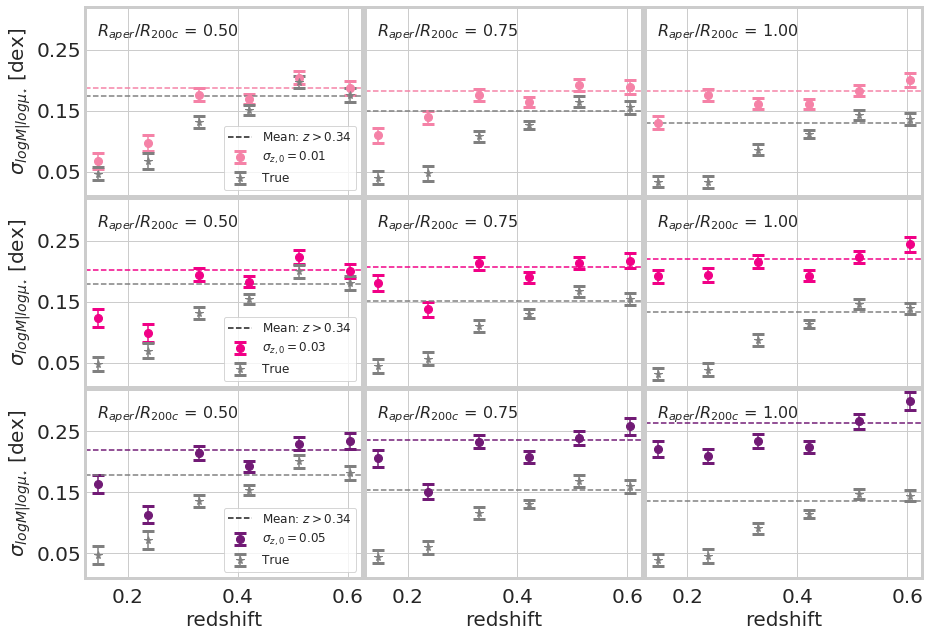

In [111]:
prop = 1/2.
fig, axs = plt.subplots(3, 3, figsize=(3*5, 5*3*prop+3), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
mylabels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=20)
    
    for j in range(3):
        run = runs_all[3*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=mylabels[0]%z_widths[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=mylabels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,0.272,title)
        
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=20)
    ax[0].axhline(-1., color='k', ls='--',label='Mean: $z>0.34$')
    ax[0].legend(loc='lower right', fontsize=12)
    ax[0].set_ylim(0.01,0.32)
    ax[0].set_yticks(np.linspace(0.05,0.25,3))
# fig.suptitle(mor_relation_label,fontsize=20)
save_figures(fig,4,is_tight=False, ext='png')
save_figures(fig,4,is_tight=False)


## Figure 3 - Slope dependence with photo-z quality and cluster aperture

In [112]:
keys = {'scatter':'scatter: $\\sigma$','intercept':'intercept: $\\alpha$','slope':'slope: $\\beta$'}
par_name = 'slope'

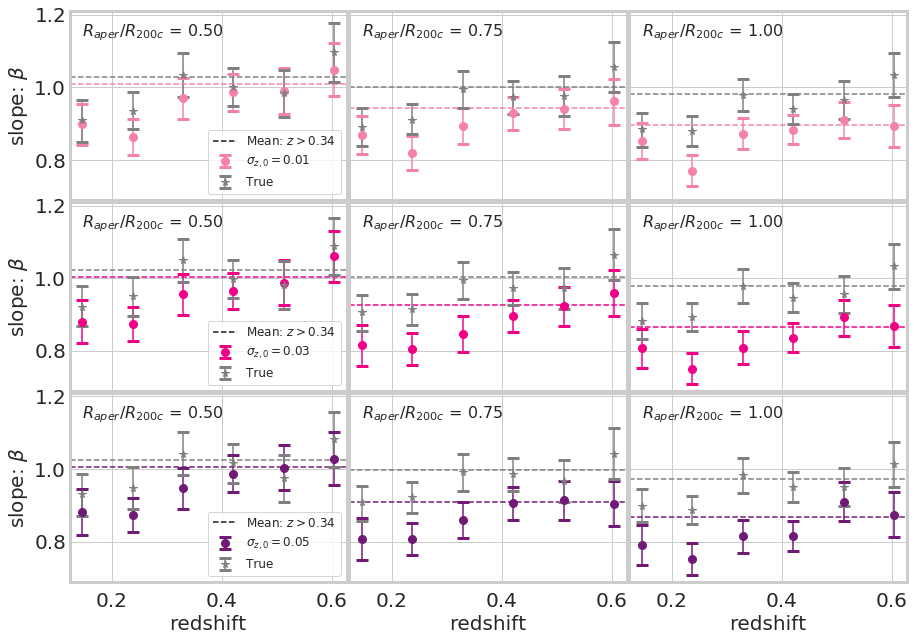

In [113]:
prop = 1/2.
fig, axs = plt.subplots(3, 3, figsize=(3*5, 5*3*prop+3), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
mylabels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=20)
    
    for j in range(3):
        run = runs_all[3*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=mylabels[0]%z_widths[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=mylabels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,1.14,title)
        
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=20)
    ax[0].axhline(-1., color='k', ls='--',label='Mean: $z>0.34$')
    ax[0].legend(loc='lower right', fontsize=12)
    ax[0].set_ylim(0.69,1.21)
    
save_figures(fig,3,is_tight=False, ext='png')
save_figures(fig,3,is_tight=False)


## Figure 4 - Intercept dependence with photo-z quality and cluster aperture

In [114]:
keys = {'scatter':'scatter: $\\sigma$','intercept':'intercept: $\\alpha$','slope':'slope: $\\beta$'}
par_name = 'intercept'

In [48]:
# fig, axs = plt.subplots(3, 3, figsize=(3*6, 3*6*2/3), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
# plt.subplots_adjust(wspace = 0.01, hspace=0.01)

# axs = axs.T
# mylabels = [r'$\sigma_{z,0} = %.2f$', r'True']

# self = mor_evol
# for i in range(3):
#     ax = axs[:,i]
#     color1 = colors[i]
#     axs[0,i].set_ylabel(keys[par_name], fontsize=24)
    
#     for j in range(4):
#         run = runs_all[4*i+j]
#         name = run+'_z%i'
#         plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
#                            color=color1, color2=color1, label=mylabels[0]%z_widths[i])

#         name = run+'_true_z%i'
#         color2 = 'gray'
#         plot_par_evolution(self, zmed, par_name, name,
#                            ax=ax[j], fmt='*', color=color2, color2=color2, label=mylabels[1])
#         title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
#         ax[j].text(0.145,013.6,title)
        
#         #ax[j].set_title(title)
#         axs[j,2].set_xlabel('redshift',fontsize=24)
#     ax[0].axhline(-1., color='k', ls='--',label='Mean')
#     ax[0].legend(loc='lower right', fontsize=12)
#     ax[0].set_ylim(12.9,13.7)
    
# save_figures(fig,4,is_tight=False, ext='png')
# save_figures(fig,4,is_tight=False)


## Starting Plots

In [8]:
mor_all = load_mor_results('mor_uniform_pz_and_raper_variation')

## Plot 0

In [13]:
run = runs_all[4+2]

This run is: gauss003_rhod_02Lstar_raper100


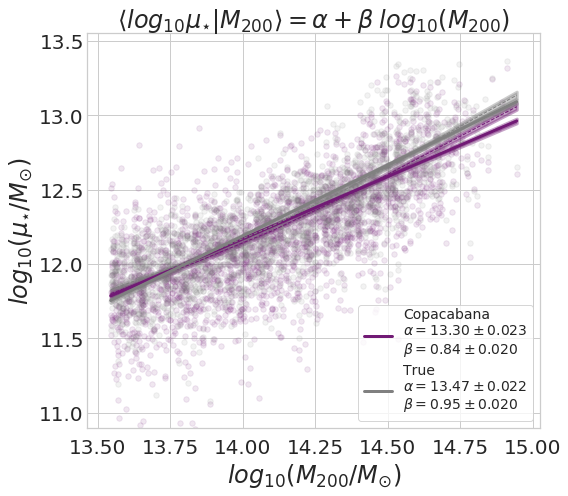

In [14]:
#Generate figure if none provided
fig, axs = plt.subplots(1, 1, figsize=(8, 8*22/24))

ax = axs
plot_output(mor_all,run, 'y', show_data=True, ax = ax, color=colors[2], label=get_fit_label(mor_all,run,'Copacabana'))
plot_output(mor_all,run+'_true', 'y', show_data=True, ax = ax, color='gray', label=get_fit_label(mor_all,run+'_true','True'))

ax.legend(fontsize=14)
ax.set_ylim(10.9,)
ax.set_ylabel(labels[1],fontsize=24)
ax.set_xlabel(labels[0],fontsize=24)
ax.set_title(mor_relation_label,fontsize=24)
save_figures(fig,2,is_tight=True)
print('This run is: %s'%run)
# count+=1

# Overall Parameters

In [15]:
zvalues = [0.01, 0.03, 0.05]
convert_label = {zi:zfile for zi,zfile in zip(zvalues, pz_files)}
def get_run(zsigma, raper):
    zfile = convert_label[zsigma]
    return '{}_{}_{}_raper{:02d}'.format(zfile,'rhod','02Lstar',int(100*raper))

In [16]:
runsz = ['{}_{}_{}_raper{:02d}'.format(zfile,'rhod','02Lstar',int(100*0.5)) for zfile in pz_files]
runsz

['gauss001_rhod_02Lstar_raper50',
 'gauss003_rhod_02Lstar_raper50',
 'gauss005_rhod_02Lstar_raper50']

In [17]:
zvalues = np.array([0.01,0.03,0.05])
runsz_label = {li: r'$\sigma_0 = %.2f$'%vi for li,vi in zip(runsz,zvalues)}
runsz_label

{'gauss001_rhod_02Lstar_raper50': '$\\sigma_0 = 0.01$',
 'gauss003_rhod_02Lstar_raper50': '$\\sigma_0 = 0.03$',
 'gauss005_rhod_02Lstar_raper50': '$\\sigma_0 = 0.05$'}

In [18]:
np.where(np.array(zvalues)==0.01)[0]

array([0])

In [19]:
def plot_params_fixed_z(zfixed, param_name, ax=None, is_line=False):
    if ax is None: ax = plt.axes()
    rapers = [0.5,0.75,1.0,1.25]
    ix = int(np.where(zvalues==zfixed)[0])
    labels = [r'Copacabana: $\sigma_{z,0} = %.2f$'%zfixed, r'True']
    for _,ri in zip(colors,rapers):
        run = get_run(zfixed, ri)
        x = get_params(mor_all,run,param_name)
        y = np.array([ri for i in range(len(x[0]))])
        ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=colors[ix],
                 fmt='o', capsize=6, capthick=3, markersize=8)

        xt = get_params(mor_all,run+'_true',param_name)
        yt = np.array([ri for i in range(len(xt[0]))])
        ax.errorbar(xt[0],yt,xerr=[xt[1],xt[2]],color=colors[ix],
                 fmt='*', capsize=6, capthick=3, markersize=12)
        if (is_line)&(ri==0.5):
            ax.axvline(x[0][0],lw=2,ls='--',color='k')
            
    ax.errorbar(x[0],0.*y,xerr=[x[1],x[2]],color=colors[ix],label=labels[0],
             fmt='o', capsize=6, capthick=3, markersize=8)
    ax.plot(x[0],0*y,color=colors[ix],label=labels[1],
                 marker='*', markersize=12)

    _ = ax.set_yticks(rapers)
    ax.set_ylim(0.4,1.5)


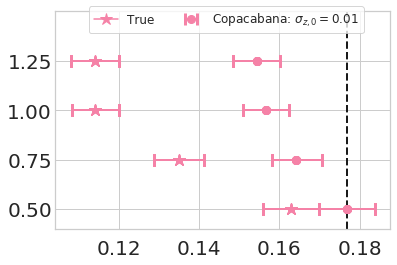

In [20]:
plot_params_fixed_z(0.01,'scatter', is_line=True)
plt.legend(fontsize=12,loc=(0.1,0.9),ncol=2)

In [21]:
def plot_params_fixed_raper(raper, param_name, ax=None):
    if ax is None: ax = plt.axes()
    for ci,zi in zip(colors, zvalues):
        run = get_run(zi, raper)
        x = get_params(mor_all,run,param_name)
        vi = '$\\sigma_0 = %.2f$'%zi
        y = [vi for i in range(len(x[0]))]
        ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
                 fmt='o', capsize=6, capthick=3, markersize=12)

        x = get_params(mor_all,run+'_true',param_name)
        ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
                 fmt='*', capsize=6, capthick=3, markersize=12)
        #ax.set_ylim(0.005, 0.055)
    #_ = ax.set_yticks(rapers)


Text(0.5,0,'intercept')

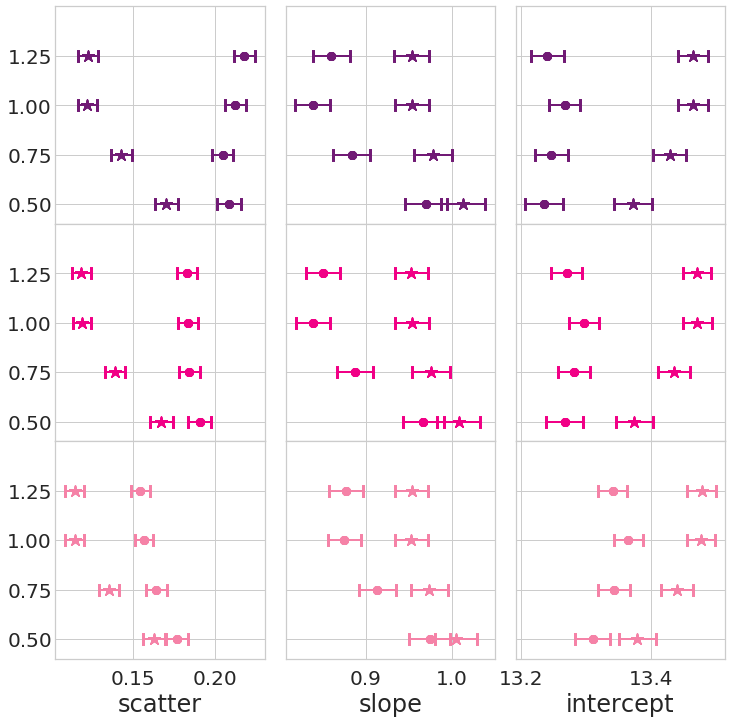

In [22]:
fig, axs = plt.subplots(3,3,figsize=(12,12),sharex='col', sharey='all')
fig.subplots_adjust(hspace=0., wspace=0.1)

for i in range(3):
    plot_params_fixed_z(zvalues[2-i],'scatter',ax=axs[i,0])
axs[2,0].set_xlabel(r'scatter',fontsize=24)
    #axs[i].set_title('fixed photo-z: $\\sigma_0 = %.2f$'%zvalues[2-i],fontsize=20)
    
for i in range(3):
    plot_params_fixed_z(zvalues[2-i],'slope',ax=axs[i,1])
axs[2,1].set_xlabel(r'slope',fontsize=24)

for i in range(3):
    plot_params_fixed_z(zvalues[2-i],'intercept',ax=axs[i,2])
axs[2,2].set_xlabel(r'intercept',fontsize=24)

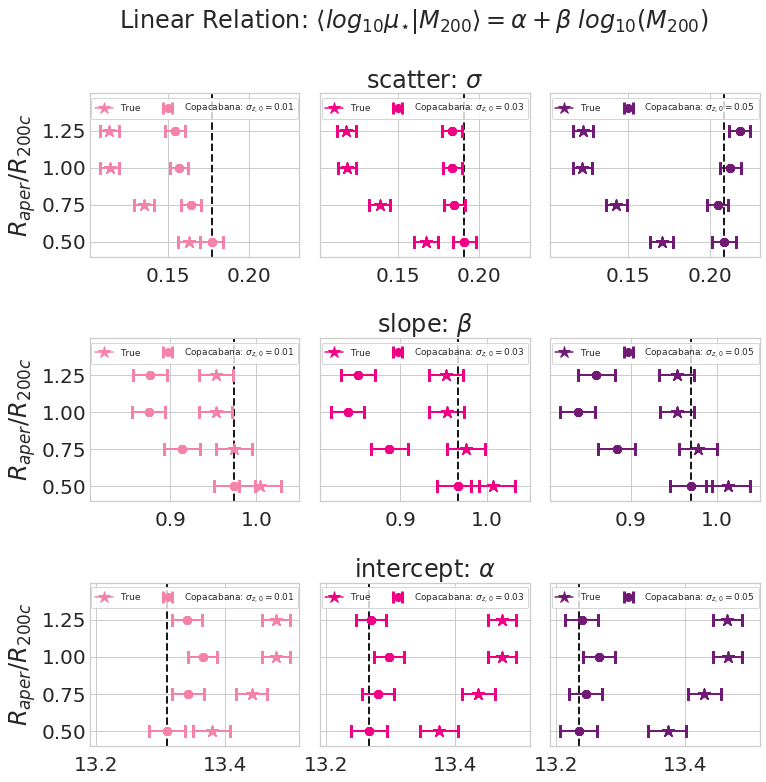

In [23]:
fig, axs = plt.subplots(3,3,figsize=(12,12),sharex='row', sharey='all')
fig.subplots_adjust(hspace=0.5, wspace=0.1)

for i in range(3):
    plot_params_fixed_z(zvalues[i],'scatter',ax=axs[0,i],is_line=True)
    axs[0,i].legend(fontsize=9,loc='upper center',ncol=2)
    
axs[0,1].set_title(r'scatter: $\sigma$',fontsize=24)
axs[0,0].set_ylabel(r'$R_{aper}/R_{200c}$',fontsize=24)


for i in range(3):
    plot_params_fixed_z(zvalues[i],'slope',ax=axs[1,i], is_line=True)
    axs[1,i].legend(fontsize=9,loc='upper center',ncol=2)
axs[1,1].set_title(r'slope: $\beta$',fontsize=24)
axs[1,0].set_ylabel(r'$R_{aper}/R_{200c}$',fontsize=24)

for i in range(3):
    plot_params_fixed_z(zvalues[i],'intercept',ax=axs[2,i],is_line=True)
    axs[2,i].legend(fontsize=9,loc='upper center',ncol=2)
axs[2,1].set_title(r'intercept: $\alpha$',fontsize=24)
axs[2,0].set_ylabel(r'$R_{aper}/R_{200c}$',fontsize=24)

fig.suptitle('Linear Relation: '+mor_relation_label, fontsize=24)
fig.savefig('mor_params_raper_zwidth.pdf',dpi=100)

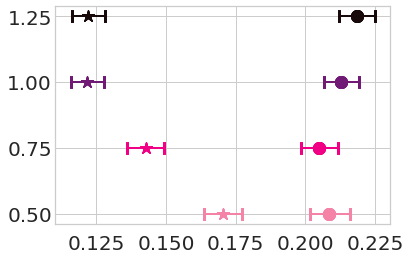

In [24]:
ax = plt.axes()
raper = 0.75
rapers = [0.5,0.75,1.0,1.25]
for ci,zi in zip(colors,rapers):
    #run = get_run(zi, raper)
    run = get_run(0.05, zi)
    zfile = convert_label[0.01]
    vi = '$\\sigma_0 = %.2f$'%zi
    x = get_params(mor_all,run,'scatter')
    y = [zi for i in range(len(x[0]))]
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='o', capsize=6, capthick=3, markersize=12)
    
    x = get_params(mor_all,run+'_true','scatter')
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='*', capsize=6, capthick=3, markersize=12)
_ = plt.yticks(rapers)

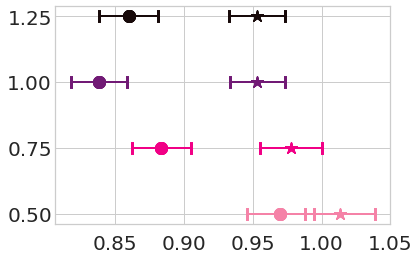

In [25]:
ax = plt.axes()
raper = 0.75
rapers = [0.5,0.75,1.0,1.25]
for ci,zi in zip(colors,rapers):
    #run = get_run(zi, raper)
    run = get_run(0.05, zi)
    zfile = convert_label[0.01]
    vi = '$\\sigma_0 = %.2f$'%zi
    x = get_params(mor_all,run,'slope')
    y = [zi for i in range(len(x[0]))]
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='o', capsize=6, capthick=3, markersize=12)
    
    x = get_params(mor_all,run+'_true','slope')
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='*', capsize=6, capthick=3, markersize=12)
_ = plt.yticks(rapers)

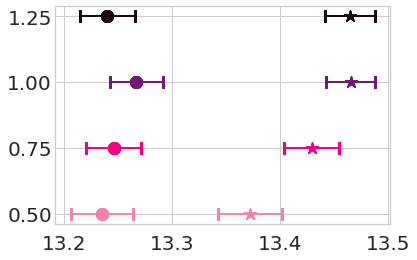

In [26]:
ax = plt.axes()
raper = 0.75
rapers = [0.5,0.75,1.0,1.25]
for ci,zi in zip(colors,rapers):
    #run = get_run(zi, raper)
    run = get_run(0.05, zi)
    zfile = convert_label[0.01]
    vi = '$\\sigma_0 = %.2f$'%zi
    x = get_params(mor_all,run,'intercept')
    y = [zi for i in range(len(x[0]))]
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='o', capsize=6, capthick=3, markersize=12)
    
    x = get_params(mor_all,run+'_true','intercept')
    ax.errorbar(x[0],y,xerr=[x[1],x[2]],color=ci,
             fmt='*', capsize=6, capthick=3, markersize=12)
_ = plt.yticks(rapers)

<ErrorbarContainer object of 3 artists>

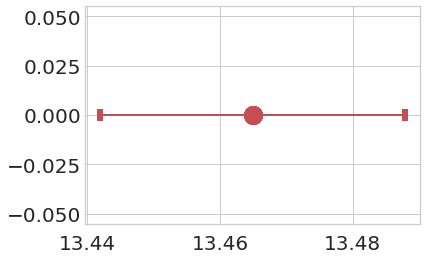

In [27]:
color = 'r'
plt.errorbar(x[0],np.zeros_like(x[0]),xerr=[x[1],x[2]],color=color,
             fmt='o', capsize=6, capthick=6, markersize=18)

## Redshift Evolution

In [28]:
# from scripts.fit_mor_evolution import mass_observable_relation

In [29]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 16})
#Plotting parameters
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20
mpl.rcParams['axes.linewidth'] = 3. #set the value globally

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
# Default_Params = {'default_cmap'   : plt.cm.coolwarm,
#                   'title_fontsize' : 25,
#                   'legend_fontsize': 22,
#                   'xlabel_fontsize': 30,
#                   'ylabel_fontsize': 30,
#                   'scatter_factor' : 1.0}

# Params = Default_Params.copy()
# sns.set_style("whitegrid")
# sns.set_context('talk')

In [58]:
import linmix

def plot_par_evolution(self,zmed,var,name,ax=None,do_fit=False,
                       zp=0.35,fmt='o',color='b',color2='k',label=''):
    if ax is None: ax = plt.axes()
    
    to_fit = []
    #nbins = self.data[name%0]['nBins']
    for i in range(len(zmed)):
        zi = zmed[i]
        lm = self.data[name%i]['linmix']
        median = np.mean(lm[var])
        lower_quartile, upper_quartile = np.mean(lm[var+'-']),np.mean(lm[var+'+'])
        si = 0.5*(upper_quartile-lower_quartile)
        to_fit.append([zi,median,si,lower_quartile,upper_quartile])
    to_fit = np.array(to_fit).T
    
    #p = ax.plot(to_fit[0], to_fit[1], fmt, color=color,label=label)
    #ax.vlines(to_fit[0], to_fit[3], to_fit[4], color=p[0].get_color(), capsize=6, capthick=3)
    ax.errorbar(to_fit[0], to_fit[1], yerr=[to_fit[1]-to_fit[3],to_fit[4]-to_fit[1]],color=color,
                 fmt=fmt, capsize=6, capthick=3, markersize=8, label=label)

    ax.axhline(np.mean(to_fit[1]), color=color, ls='--')
    #ax.axvline(0.32, color='k', ls='--')
    
    if do_fit:
        eta = np.log((1+to_fit[0])/(1+zp))
        lm1 = linmix.LinMix(eta, to_fit[1], ysig=to_fit[2], nchains=4,  K=3)
        lm1.run_mcmc(silent=True, maxiter=10000)
        plot_linmix(np.linspace(np.min(to_fit[0])-0.025,np.max(to_fit[0])+0.025,31),lm1,zp=zp,ax=ax,color=color1)
        
    #ax.set_ylabel(var)

def plot_linmix(z,lm1,zp=0.4,ax=None,color='k',label=''):
    if ax is None: ax = plt.axes()
    
    eta = np.log((1+z)/(1+zp))
    m1 = np.median(lm1.chain['alpha'][:,np.newaxis]     + lm1.chain['beta'][:,np.newaxis]*eta,axis=0)
    q1 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,16,axis=0)
    q2 = np.percentile(lm1.chain['alpha'][:,np.newaxis] + lm1.chain['beta'][:,np.newaxis]*eta,84,axis=0)
    
    p = ax.plot(z,m1,color=color,label=label)
    ax.fill_between(z,q1,q2,alpha=0.3,color=p[0].get_color())


In [47]:
run = runs_all[0]
mor_evol = load_mor_results('mor_uniform_pz_and_raper_variation_evol_nbins6')

# zbins = np.percentile(zcls,np.linspace(0,100,16))
zbins = np.linspace(0.1,0.65,7)
zmed = 0.5*(zbins[1:]+zbins[:-1])

print('run:', run)
print('zmed: ',zmed)


('run:', 'gauss001_rhod_02Lstar_raper50')
('zmed: ', array([0.14583333, 0.2375    , 0.32916667, 0.42083333, 0.5125    ,
       0.60416667]))


In [48]:
# mor_evol.data[name%i]['kllr']

Text(0.5,0,'redshift')

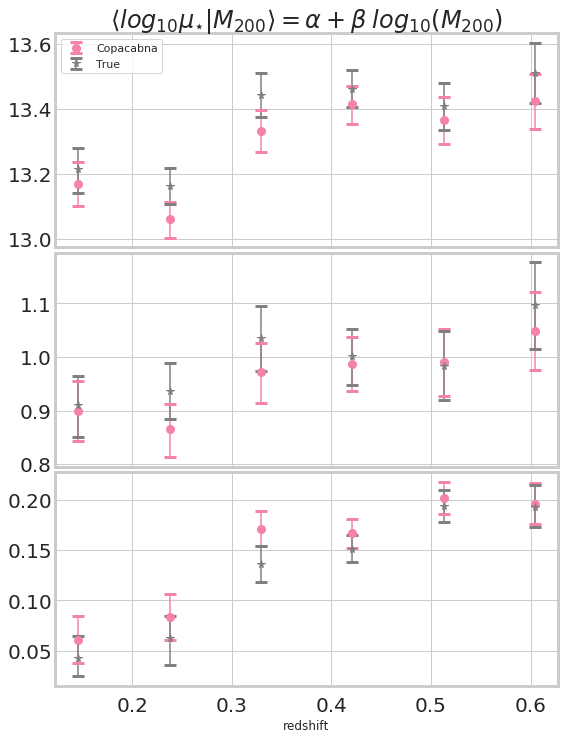

In [33]:
fig, ax = plt.subplots(3, 1, figsize=(9, 12), sharex = True) #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(hspace = 0.025)

self = mor_evol
name = run+'_z%i'
color1 = colors[0]
plot_par_evolution(self, zmed, 'intercept', name, ax=ax[0], color=color1, color2=color1, label='Copacabna')
plot_par_evolution(self, zmed, 'slope'    , name, ax=ax[1], color=color1, color2=color1)
plot_par_evolution(self, zmed, 'scatter'  , name, ax=ax[2], color=color1, color2=color1)

name = run+'_true_z%i'
color1 = 'gray'
plot_par_evolution(self, zmed, 'intercept', name, ax=ax[0], fmt='*', color=color1, color2=color1, label='True')
plot_par_evolution(self, zmed, 'slope'    , name, ax=ax[1], fmt='*', color=color1, color2=color1)
plot_par_evolution(self, zmed, 'scatter'  , name, ax=ax[2], fmt='*', color=color1, color2=color1)

ax[0].legend(loc=2)
ax[0].set_title(mor_relation_label,fontsize=24)
ax[2].set_xlabel('redshift')

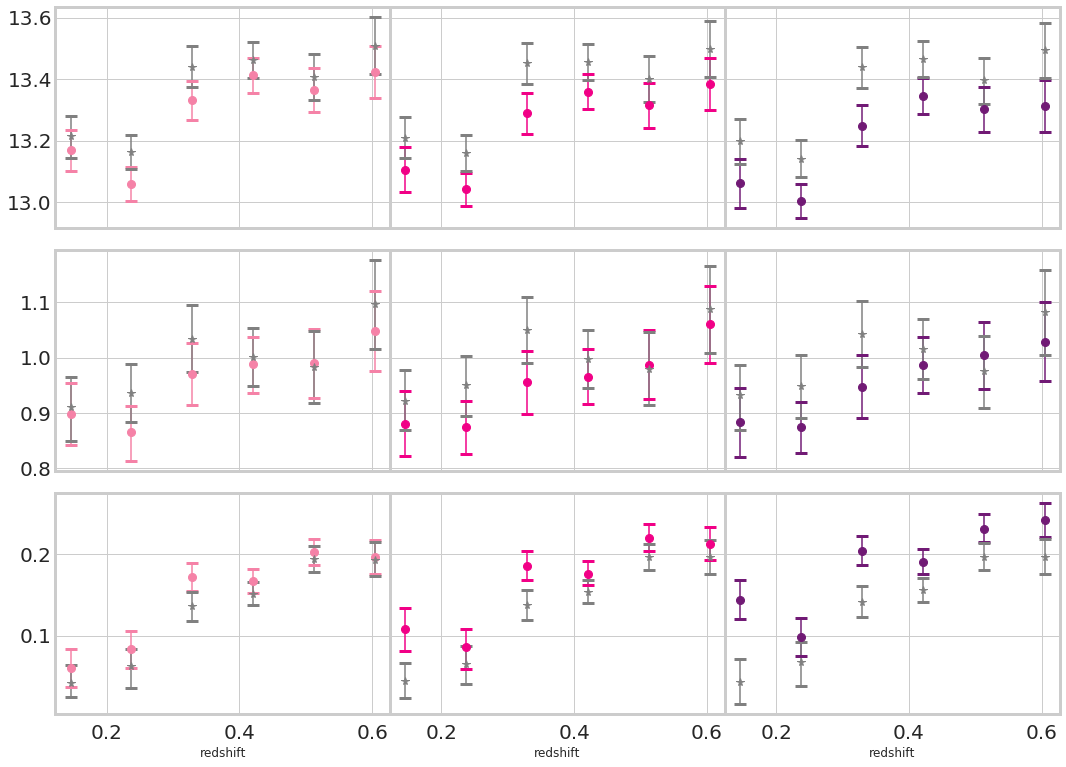

In [34]:
fig, axs = plt.subplots(3, 3, figsize=(3*6, 3*6*3/4), sharex = True, sharey='row') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0., hspace=0.1)

self = mor_evol

for i in range(3):
    ax = axs[:,i]
    run = runs_all[i*4]
    name = run+'_z%i'
    color1 = colors[i]
    plot_par_evolution(self, zmed, 'intercept', name, ax=ax[0], color=color1, color2=color1, label='Copacabna')
    plot_par_evolution(self, zmed, 'slope'    , name, ax=ax[1], color=color1, color2=color1)
    plot_par_evolution(self, zmed, 'scatter'  , name, ax=ax[2], color=color1, color2=color1)

    name = run+'_true_z%i'
    color1 = 'gray'
    plot_par_evolution(self, zmed, 'intercept', name, ax=ax[0], fmt='*', color=color1, color2=color1, label='True')
    plot_par_evolution(self, zmed, 'slope'    , name, ax=ax[1], fmt='*', color=color1, color2=color1)
    plot_par_evolution(self, zmed, 'scatter'  , name, ax=ax[2], fmt='*', color=color1, color2=color1)

    ax[2].set_xlabel('redshift')

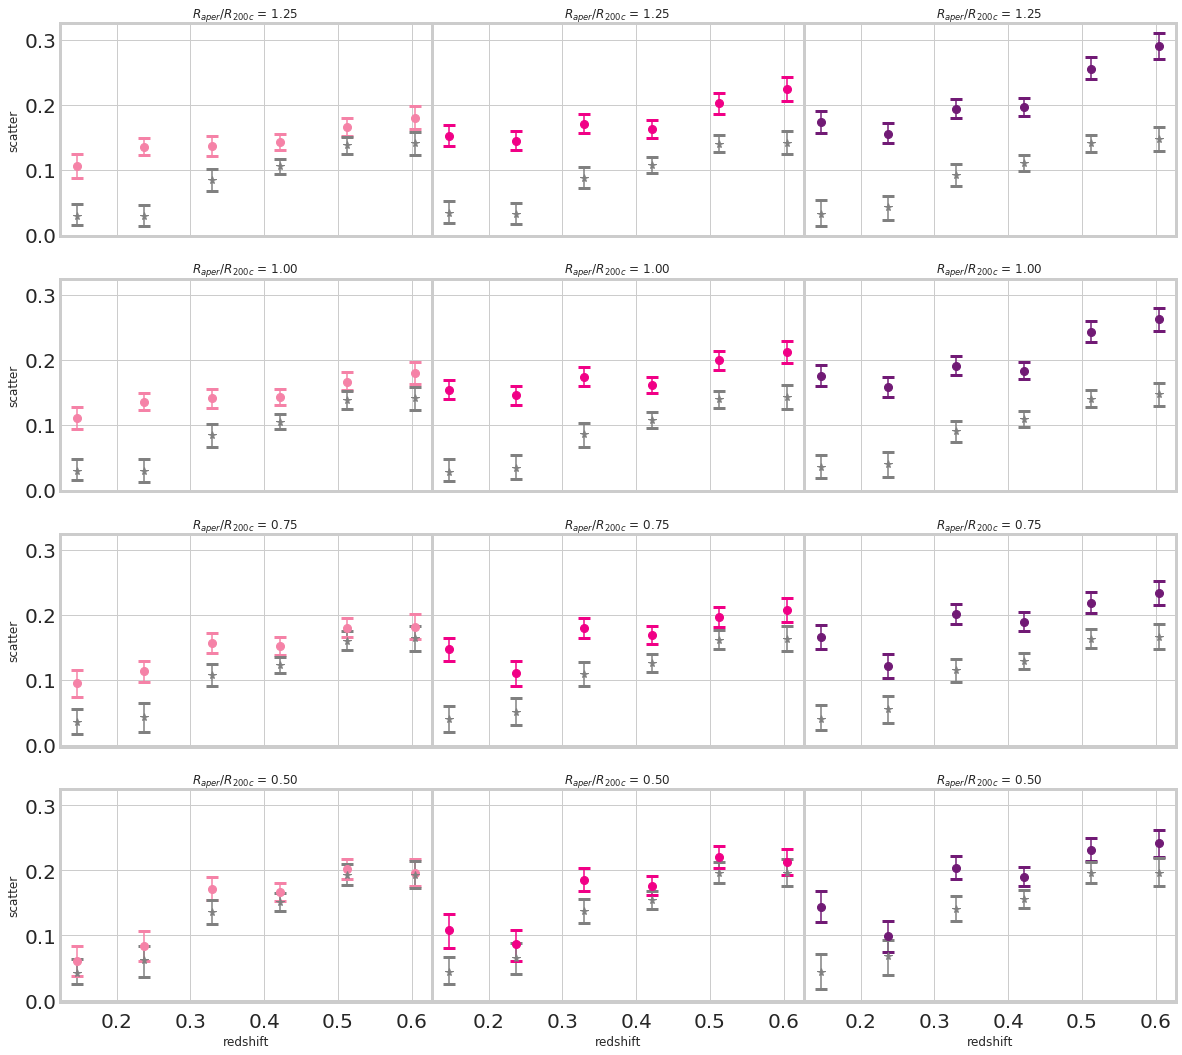

In [35]:
fig, axs = plt.subplots(4, 3, figsize=(3*6+2, 4*6*3/4), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0., hspace=0.2)

self = mor_evol

for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    
    for j in range(4):
        run = runs_all[4*i+(3-j)]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, 'scatter', name, ax=ax[j], color=color1, color2=color1, label='Copacabna')

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, 'scatter', name, ax=ax[j], fmt='*', color=color2, color2=color2, label='True')
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[3-j])
        ax[j].set_title(title)
    
        axs[j,0].set_ylabel('scatter')
        
    ax[3].set_xlabel('redshift')

In [36]:
runs_all

['gauss001_rhod_02Lstar_raper50',
 'gauss001_rhod_02Lstar_raper75',
 'gauss001_rhod_02Lstar_raper100',
 'gauss001_rhod_02Lstar_raper125',
 'gauss003_rhod_02Lstar_raper50',
 'gauss003_rhod_02Lstar_raper75',
 'gauss003_rhod_02Lstar_raper100',
 'gauss003_rhod_02Lstar_raper125',
 'gauss005_rhod_02Lstar_raper50',
 'gauss005_rhod_02Lstar_raper75',
 'gauss005_rhod_02Lstar_raper100',
 'gauss005_rhod_02Lstar_raper125']

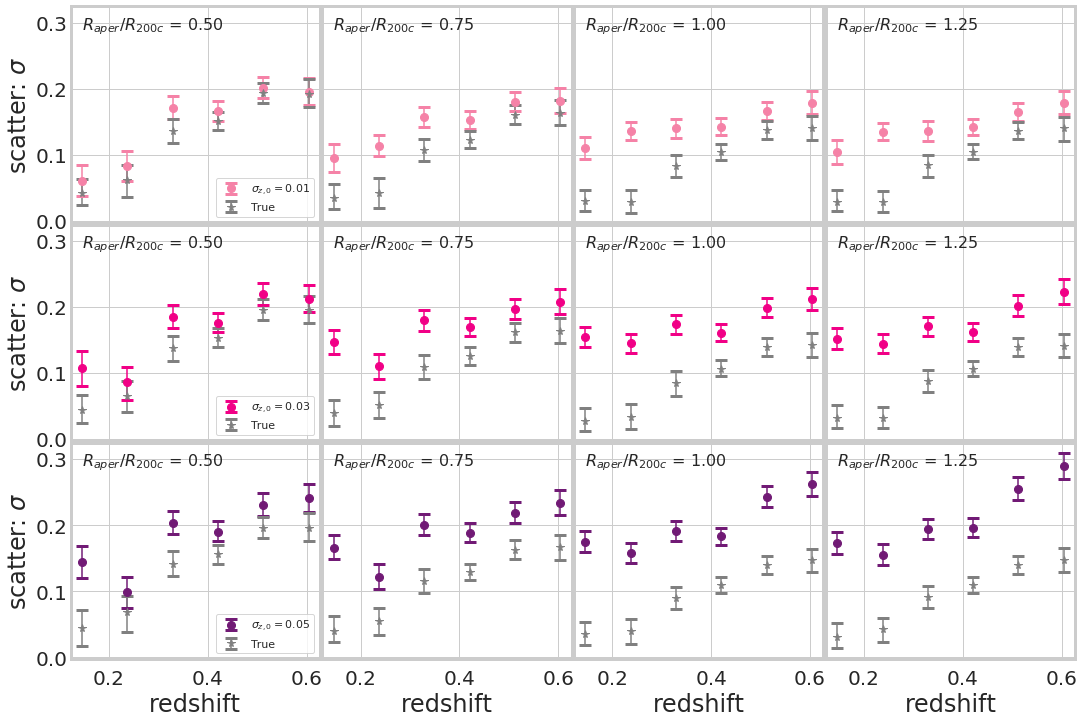

In [45]:
fig, axs = plt.subplots(3, 4, figsize=(3*6, 4*6*2/4), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
labels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=24)
    
    for j in range(4):
        run = runs_all[4*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=labels[0]%zvalues[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=labels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,0.29,title)
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=24)
    ax[0].legend(loc='lower right')
    

In [51]:
par_name = 'intercept'

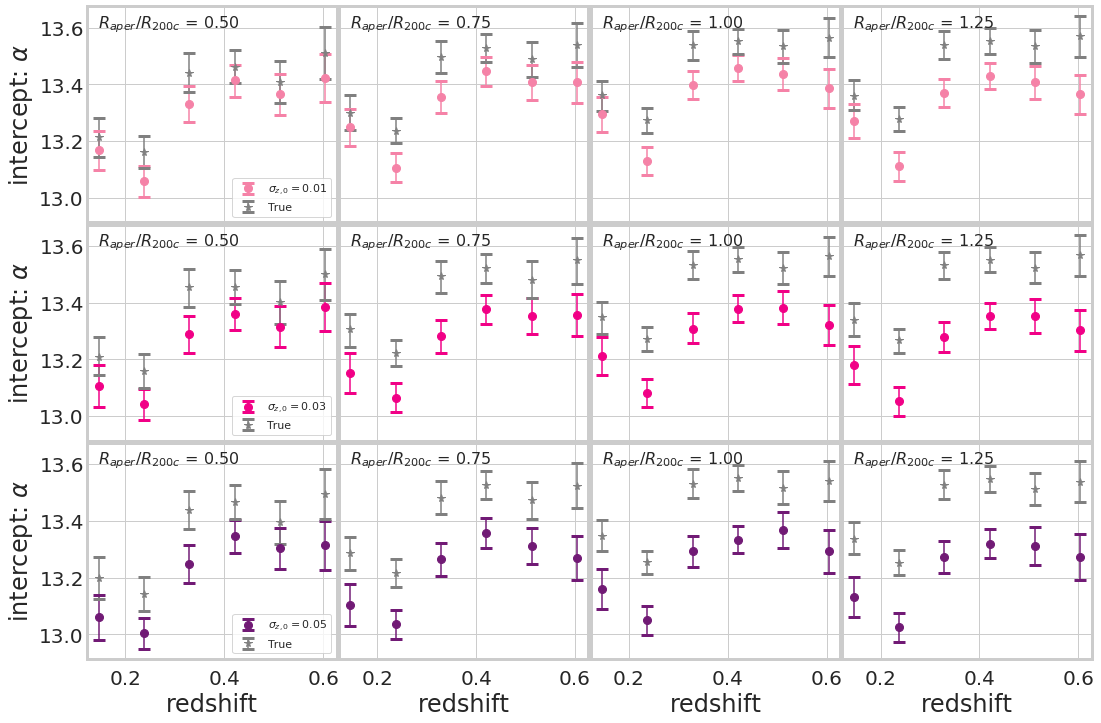

In [53]:
fig, axs = plt.subplots(3, 4, figsize=(3*6, 4*6*2/4), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
labels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=24)
    
    for j in range(4):
        run = runs_all[4*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=labels[0]%zvalues[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=labels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,013.6,title)
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=24)
    ax[0].legend(loc='lower right')
    

In [75]:
par_name = 'slope'

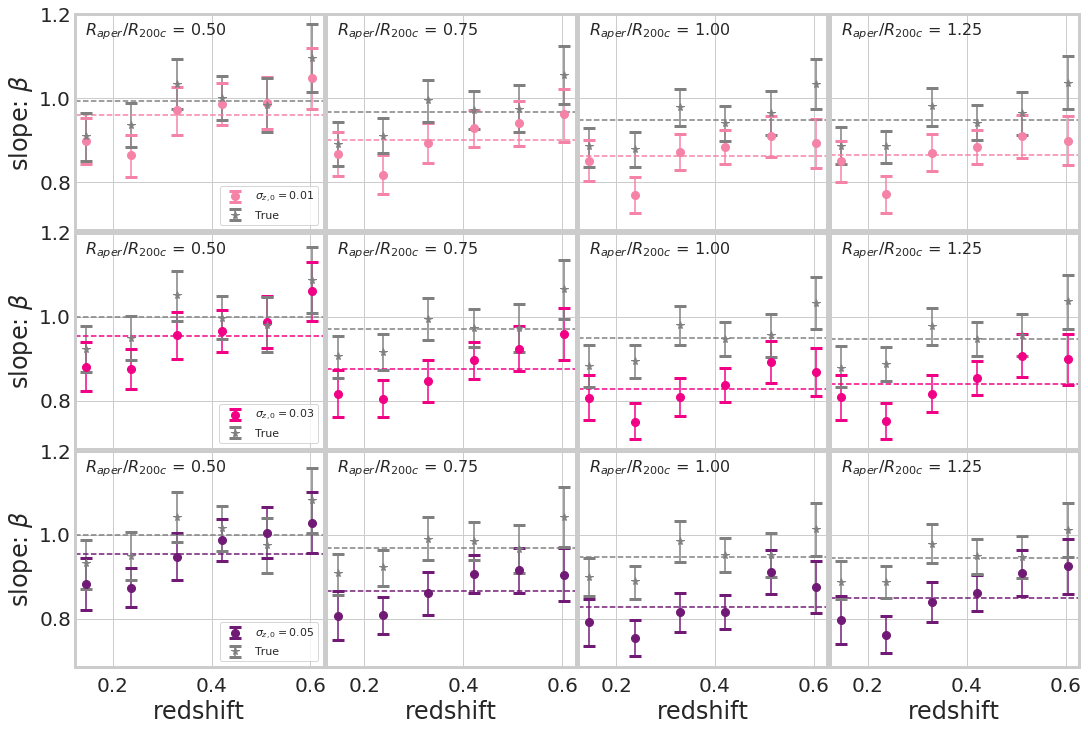

In [77]:
fig, axs = plt.subplots(3, 4, figsize=(3*6, 4*6*2/4), sharex = True, sharey='all') #gridspec_kw = {'height_ratios':[1.75, 1, 1]}
plt.subplots_adjust(wspace = 0.01, hspace=0.01)

axs = axs.T
labels = [r'$\sigma_{z,0} = %.2f$', r'True']

self = mor_evol
for i in range(3):
    ax = axs[:,i]
    color1 = colors[i]
    axs[0,i].set_ylabel(keys[par_name], fontsize=24)
    
    for j in range(4):
        run = runs_all[4*i+j]
        name = run+'_z%i'
        plot_par_evolution(self, zmed, par_name, name, ax=ax[j], 
                           color=color1, color2=color1, label=labels[0]%z_widths[i])

        name = run+'_true_z%i'
        color2 = 'gray'
        plot_par_evolution(self, zmed, par_name, name,
                           ax=ax[j], fmt='*', color=color2, color2=color2, label=labels[1])
        title = r'$R_{aper}/R_{200c}$ = %.2f'%(r_apers[j])
        ax[j].text(0.145,1.15,title)
        #ax[j].set_title(title)
        axs[j,2].set_xlabel('redshift',fontsize=24)
    ax[0].legend(loc='lower right')
    